In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf


In [35]:
import os


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
data_dir = 'C:\\DS\\RiceleafDataset'

In [37]:
classes = os.listdir(data_dir)
classes

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [23]:
image_size = (64, 64)
batch_size = 16

In [24]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    subset = 'training',
    validation_split =0.1,
    seed = 42,
    image_size=image_size,
    batch_size=batch_size,
    label_mode = 'int',
    class_names = classes
)

Found 119 files belonging to 3 classes.
Using 108 files for training.


In [25]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    subset = 'validation',
    validation_split =0.1,
    seed = 42,
    image_size=image_size,
    batch_size=batch_size,
    label_mode = 'int',
    class_names = classes
)

Found 119 files belonging to 3 classes.
Using 11 files for validation.


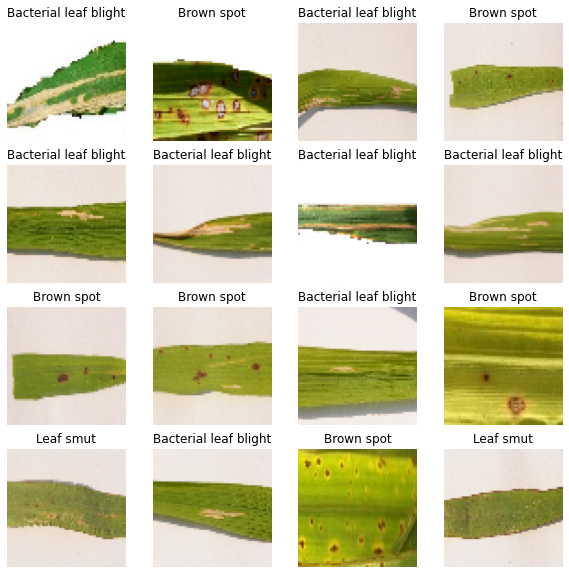

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
        plt.axis('off')

# MLP Model


In [27]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,200), random_state=1, max_iter=300, solver='adam', alpha=0.0001,
                    learning_rate_init=0.001)

In [28]:
train_samples = sum([16 for [x, _] in train_ds])
train_samples

112

In [29]:
class_ids = [x for x in range(len(classes))]

In [38]:
epochs = 15

for epoch in range(epochs):
    print(f'Epoch {epoch+1}/10')

    for images, labels in train_ds.take(train_samples // batch_size):
        images = images.numpy().reshape((images.shape[0],images.shape[1]*images.shape[2]*images.shape[3]))
        labels = labels.numpy()
        clf.partial_fit(images, labels, classes=class_ids)
        print(f"Partial Score: {clf.score(images, labels)}")

Epoch 1/10
Partial Score: 0.5625
Partial Score: 0.625
Partial Score: 0.6875
Partial Score: 0.6875
Partial Score: 0.875
Partial Score: 0.5625
Partial Score: 0.3333333333333333
Epoch 2/10
Partial Score: 0.5625
Partial Score: 0.6875
Partial Score: 0.75
Partial Score: 0.5
Partial Score: 0.6875
Partial Score: 0.6875
Partial Score: 0.5833333333333334
Epoch 3/10
Partial Score: 0.5625
Partial Score: 0.75
Partial Score: 0.375
Partial Score: 0.375
Partial Score: 0.5625
Partial Score: 0.625
Partial Score: 0.5833333333333334
Epoch 4/10
Partial Score: 0.5625
Partial Score: 0.625
Partial Score: 0.4375
Partial Score: 0.8125
Partial Score: 0.5
Partial Score: 0.5
Partial Score: 0.5
Epoch 5/10
Partial Score: 0.75
Partial Score: 0.4375
Partial Score: 0.75
Partial Score: 0.625
Partial Score: 0.6875
Partial Score: 0.5625
Partial Score: 0.75
Epoch 6/10
Partial Score: 0.625
Partial Score: 0.4375
Partial Score: 0.375
Partial Score: 0.5
Partial Score: 0.5
Partial Score: 0.75
Partial Score: 0.6666666666666666
E

In [39]:
val_samples = sum([16 for [x, _] in val_ds])
val_samples

16

In [40]:
y_val = []
y_val_pred = []

for images, targets in train_ds.take(val_samples // batch_size):
    for i in range(batch_size):
        
        image = images[i].numpy().reshape((images[i].shape[0]*images[i].shape[1]*images[i].shape[2]))
        label = int(targets[i])
        prediction = clf.predict([image])
        y_val_pred.append(prediction[0])
        y_val.append(label)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)

In [42]:
import plotly.express as px

fig = px.imshow(
    cm,
    labels=dict(x='Predictions', y='Actuals'),
    x=classes,
    y=classes
)

fig.update_xaxes(side='top')
fig.show()